In [1]:
import pandas as pd

## Read input files for the analysis

In [61]:
survey1 = pd.read_csv("survey1_IoU_image_box_size.csv")
survey2 = pd.read_csv("survey2_accept_IoU_image_box_size.csv")
survey3 = pd.read_csv("survey3_sym_asym.csv")
survey4 = pd.read_csv("survey4_accept_sym_asym.csv")

### Number of participants in each study

In [3]:
print(len(list(set(survey1["ResponseId"]))))
print(len(list(set(survey2["ResponseId"]))))
print(len(list(set(survey3["ResponseId"]))))
print(len(list(set(survey4["ResponseId"]))))

77
62
70
66


### Number of annotations per study

In [4]:
print(len(survey1))
print(len(survey2))
print(len(survey3))
print(len(survey4))

5544
5952
1400
1320


## Preferred Bounding Box Position

In [5]:
import numpy as np
import matplotlib.pyplot as plt


survey3.groupby(["Image", "Box"]).count()

StartDate  EndDate  Duration  ResponseId  Background  \
Image Box                                                                   
asym  No Preference        127      127       127         127         127   
      back                  44       44        44          44          44   
      front                529      529       529         529         529   
sym   No Preference        434      434       434         434         434   
      back                  99       99        99          99          99   
      front                167      167       167         167         167   

                     Question  Answer  
Image Box                              
asym  No Preference       127     127  
      back                 44      44  
      front               529     529  
sym   No Preference       434     434  
      back                 99      99  
      front               167     167

In [6]:
survey3_df = survey3.groupby(["Image", "Box"]).count().reset_index()
survey3_df

,Image,Box,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer
0,asym,No Preference,127,127,127,127,127,127,127
1,asym,back,44,44,44,44,44,44,44
2,asym,front,529,529,529,529,529,529,529
3,sym,No Preference,434,434,434,434,434,434,434
4,sym,back,99,99,99,99,99,99,99
5,sym,front,167,167,167,167,167,167,167


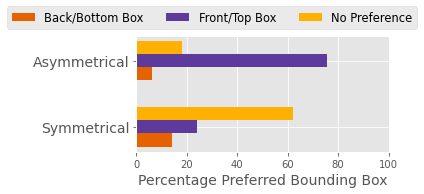

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5.5,3)

labels = ['Symmetrical', 'Asymmetrical']
no_pref = [survey3_df["Answer"].iloc[3]/sum(survey3_df["Answer"].iloc[3:6])*100, survey3_df["Answer"].iloc[0]/sum(survey3_df["Answer"].iloc[0:3])*100]
back = [survey3_df["Answer"].iloc[4]/sum(survey3_df["Answer"].iloc[3:6])*100, survey3_df["Answer"].iloc[1]/sum(survey3_df["Answer"].iloc[0:3])*100]
front = [survey3_df["Answer"].iloc[5]/sum(survey3_df["Answer"].iloc[3:6])*100, survey3_df["Answer"].iloc[2]/sum(survey3_df["Answer"].iloc[0:3])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, back, width, label='Back/Bottom Box', color="#E66100")
rects2 = ax.barh(x + width/2, front, width, label='Front/Top Box', color="#5D3A9B")
rects3 = ax.barh(x + width/2*3, no_pref, width, label='No Preference', color="#FFB000")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Preferred Bounding Box', fontsize=14)
ax.set_xlim([0,100])
ax.set_yticks(x + width/2)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.3, 1.3),
          ncol=3, fontsize=11.5)

fig.tight_layout()

plt.savefig('survey3_overview.png', bbox_inches='tight', format='png', dpi=1200)

In [8]:
import numpy as np
table = np.zeros((sum(survey3_df["Answer"].iloc[3:6]), 3))

subset_survey3 = survey3[survey3["Image"] == "sym"]
for i in range(len(subset_survey3)):
    if str(subset_survey3["Box"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey3["Box"].iloc[i]).lower() == "back":
        table[i,1] = 1
    if str(subset_survey3["Box"].iloc[i]).lower() == "front":
        table[i,2] = 1

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))


268.7685714285714
0.00000000000000000000000000000000000


In [9]:
df2 = pd.DataFrame(np.array(table), columns=['n', 'b', 'f'])

In [10]:
# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

,b,f,n
b,1.000000e+00,3.481557e-04,6.406646e-80
f,3.481557e-04,1.000000e+00,2.904777e-51
n,6.406646e-80,2.904777e-51,1.000000e+00


In [11]:
import numpy as np
table = np.zeros((sum(survey3_df["Answer"].iloc[0:3]), 3))

subset_survey3 = survey3[survey3["Image"] == "asym"]
for i in range(len(subset_survey3)):
    if str(subset_survey3["Box"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey3["Box"].iloc[i]).lower() == "back":
        table[i,1] = 1
    if str(subset_survey3["Box"].iloc[i]).lower() == "front":
        table[i,2] = 1


from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))



576.74
0.00000000000000000000000000000000000


In [12]:
df2 = pd.DataFrame(np.array(table), columns=['n', 'b', 'f'])

In [13]:
# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

,b,f,n
b,1.000000e+00,6.866348e-166,7.633276e-06
f,6.866348e-166,1.000000e+00,1.901091e-114
n,7.633276e-06,1.901091e-114,1.000000e+00


## Accepted Bounding Box Position

In [14]:
survey4.groupby(["Image", "Box", "Accept"]).count()

StartDate  EndDate  Duration  ResponseId  Background  \
Image Box   Accept                                                         
asym  back  NO            157      157       157         157         157   
            YES           173      173       173         173         173   
      front NO             33       33        33          33          33   
            YES           289      289       289         289         289   
sym   back  NO            119      119       119         119         119   
            YES           211      211       211         211         211   
      front NO             87       87        87          87          87   
            YES           251      251       251         251         251   

                    Question  Answer  
Image Box   Accept                    
asym  back  NO           157     157  
            YES          173     173  
      front NO            33      33  
            YES          289     289  
sym   back  NO           119     119  
            YES          211     211  
      front NO            87      87  
            YES          251     251

In [15]:
survey4_df = survey4.groupby(["Image", "Box", "Accept"]).count().reset_index()
survey4_df

,Image,Box,Accept,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer
0,asym,back,NO,157,157,157,157,157,157,157
1,asym,back,YES,173,173,173,173,173,173,173
2,asym,front,NO,33,33,33,33,33,33,33
3,asym,front,YES,289,289,289,289,289,289,289
4,sym,back,NO,119,119,119,119,119,119,119
5,sym,back,YES,211,211,211,211,211,211,211
6,sym,front,NO,87,87,87,87,87,87,87
7,sym,front,YES,251,251,251,251,251,251,251


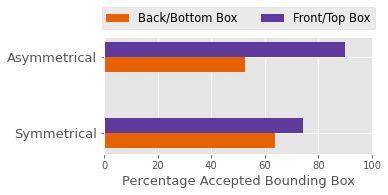

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5.5,3)

labels = ['Symmetrical', 'Asymmetrical']
back = [survey4_df["Answer"].iloc[5]/sum(survey4_df["Answer"].iloc[4:6])*100, survey4_df["Answer"].iloc[1]/sum(survey4_df["Answer"].iloc[0:2])*100]
front = [survey4_df["Answer"].iloc[7]/sum(survey4_df["Answer"].iloc[6:8])*100, survey4_df["Answer"].iloc[3]/sum(survey4_df["Answer"].iloc[2:4])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, back, width, label='Back/Bottom Box', color="#E66100")
rects2 = ax.barh(x + width/2, front, width, label='Front/Top Box', color="#5D3A9B")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Accepted Bounding Box', fontsize=13)
ax.set_xlim([0,100])
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=13)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fontsize=11.5)

fig.tight_layout()

plt.savefig('survey4_overview.png', bbox_inches='tight', format='png', dpi=1200)

In [17]:
print("Asymmetrical")
print("back", survey4_df["Answer"].iloc[5]/sum(survey4_df["Answer"].iloc[4:6])*100)
print("front", survey4_df["Answer"].iloc[7]/sum(survey4_df["Answer"].iloc[6:8])*100)

Asymmetrical
back 63.93939393939394
front 74.2603550295858


In [18]:
print("Symmetrical")
print("back", survey4_df["Answer"].iloc[1]/sum(survey4_df["Answer"].iloc[0:2])*100)
print("front", survey4_df["Answer"].iloc[3]/sum(survey4_df["Answer"].iloc[2:4])*100)

Symmetrical
back 52.42424242424243
front 89.75155279503106


In [19]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[0], survey4_df["Answer"].iloc[1]])
nobs = np.array([sum(survey4_df["Answer"].iloc[0:2]), sum(survey4_df["Answer"].iloc[0:2])])
stat, pval = proportions_ztest(count, nobs)
print("asym back", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[2], survey4_df["Answer"].iloc[3]])
nobs = np.array([sum(survey4_df["Answer"].iloc[2:4]), sum(survey4_df["Answer"].iloc[2:4])])
stat, pval = proportions_ztest(count, nobs)
print("asym front", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[4], survey4_df["Answer"].iloc[5]])
nobs = np.array([sum(survey4_df["Answer"].iloc[4:6]), sum(survey4_df["Answer"].iloc[4:6])])
stat, pval = proportions_ztest(count, nobs)
print("sym back", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[6], survey4_df["Answer"].iloc[7]])
nobs = np.array([sum(survey4_df["Answer"].iloc[6:8]), sum(survey4_df["Answer"].iloc[6:8])])
stat, pval = proportions_ztest(count, nobs)
print("sym front", stat, "{0:.35f}".format(pval))

asym back -1.2455983106584376 0.21291190281150418339706220649532042
asym front -20.175626399720976 0.00000000000000000000000000000000000
sym back -7.162190286286012 0.00000000000079398103654246241608704
sym front -12.615384615384615 0.00000000000000000000000000000000000


In [20]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[5], survey4_df["Answer"].iloc[7]])
nobs = np.array([sum(survey4_df["Answer"].iloc[4:6]), sum(survey4_df["Answer"].iloc[6:8])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

-2.8878131795828494 0.00387930205086919671284007016254236


In [21]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey4_df["Answer"].iloc[1], survey4_df["Answer"].iloc[3]])
nobs = np.array([sum(survey4_df["Answer"].iloc[0:2]), sum(survey4_df["Answer"].iloc[2:4])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

-10.486670280925232 0.00000000000000000000000009947228404


## Preferred Bounding Box Size

### Is there an association between the preferred size of the box and the size of the object?

In [22]:
survey1_df = survey1.groupby(["IoU","BoxSize"]).count().reset_index()
survey1_df

,IoU,BoxSize,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer,ImageSize
0,0.3,No Preference,95,95,95,95,95,95,95,95
1,0.3,large box,1188,1188,1188,1188,1188,1188,1188,1188
2,0.3,small box,103,103,103,103,103,103,103,103
3,0.5,No Preference,136,136,136,136,136,136,136,136
4,0.5,large box,1145,1145,1145,1145,1145,1145,1145,1145
5,0.5,small box,105,105,105,105,105,105,105,105
6,0.7,No Preference,213,213,213,213,213,213,213,213
7,0.7,large box,1051,1051,1051,1051,1051,1051,1051,1051
8,0.7,small box,122,122,122,122,122,122,122,122
9,0.9,No Preference,705,705,705,705,705,705,705,705


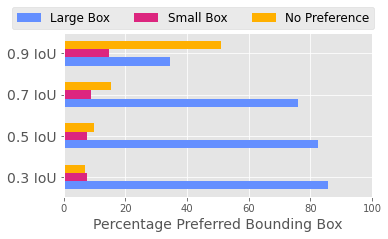

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (5.5,3.5)

labels = ['0.3 IoU', '0.5 IoU', '0.7 IoU', '0.9 IoU']
no_pref = [survey1_df["Answer"].iloc[0]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[3]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[6]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[9]/sum(survey1_df["Answer"].iloc[9:12])*100]
large = [survey1_df["Answer"].iloc[1]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[4]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[7]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[10]/sum(survey1_df["Answer"].iloc[9:12])*100]
small = [survey1_df["Answer"].iloc[2]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[5]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[8]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[11]/sum(survey1_df["Answer"].iloc[9:12])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, large, width, label='Large Box', color="#648FFF")
rects2 = ax.barh(x + width/2, small, width, label='Small Box', color="#DC267F")
rects3 = ax.barh(x + width/2*3, no_pref, width, label='No Preference', color="#FFB000")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Preferred Bounding Box', fontsize=14)
ax.set_xlim([0,100])
ax.set_yticks(x + width/2)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.42, 1.2),
          ncol=3, fontsize=12)

fig.tight_layout()
plt.grid(True)

plt.savefig('survey1_iou_box_size_correlation.png', bbox_inches='tight', format='png', dpi=1200)

In [24]:
import numpy as np

values = survey1_df["Answer"]
matrix = np.split(values, 4)
matrix

[0      95
 1    1188
 2     103
 Name: Answer, dtype: int64,
 3     136
 4    1145
 5     105
 Name: Answer, dtype: int64,
 6     213
 7    1051
 8     122
 Name: Answer, dtype: int64,
 9     705
 10    476
 11    205
 Name: Answer, dtype: int64]

In [25]:
from scipy import stats
chi2, p, dof, ex = stats.chi2_contingency(matrix, correction=True)
print(chi2)
print("{0:.35f}".format(p))

1227.841480455221
0.00000000000000000000000000000000000


### Association between bounding box size and object size

In [26]:
survey1.groupby(["ImageSize", "BoxSize"]).count()
obj_box = survey1.groupby(["ImageSize", "BoxSize"]).count().reset_index()

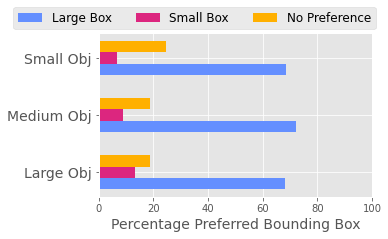

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5.5,3.5)

labels = ['Large Obj', 'Medium Obj', 'Small Obj']
no_pref = [obj_box["Answer"].iloc[0]/sum(obj_box["Answer"].iloc[0:3])*100, obj_box["Answer"].iloc[3]/sum(obj_box["Answer"].iloc[3:6])*100, obj_box["Answer"].iloc[6]/sum(obj_box["Answer"].iloc[6:9])*100]
large = [obj_box["Answer"].iloc[1]/sum(obj_box["Answer"].iloc[0:3])*100, obj_box["Answer"].iloc[4]/sum(obj_box["Answer"].iloc[3:6])*100, obj_box["Answer"].iloc[7]/sum(obj_box["Answer"].iloc[6:9])*100]
small = [obj_box["Answer"].iloc[2]/sum(obj_box["Answer"].iloc[0:3])*100, obj_box["Answer"].iloc[5]/sum(obj_box["Answer"].iloc[3:6])*100, obj_box["Answer"].iloc[8]/sum(obj_box["Answer"].iloc[6:9])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, large, width, label='Large Box', color="#648FFF")
rects2 = ax.barh(x + width/2, small, width, label='Small Box', color="#DC267F")
rects3 = ax.barh(x + width/2*3, no_pref, width, label='No Preference', color="#FFB000")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Preferred Bounding Box', fontsize=14)
ax.set_xlim([0,100])
ax.set_yticks(x + width/2)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.2),
          ncol=3, fontsize=12)

fig.tight_layout()

plt.savefig('survey1_object_box_size_correlation.png', bbox_inches='tight', format='png', dpi=1200)

In [28]:
import numpy as np

values = obj_box["Answer"]
matrix = np.split(values, 3)
matrix

[0     347
 1    1258
 2     243
 Name: Answer, dtype: int64,
 3     348
 4    1334
 5     166
 Name: Answer, dtype: int64,
 6     454
 7    1268
 8     126
 Name: Answer, dtype: int64]

In [29]:
from scipy import stats
chi2, p, dof, ex = stats.chi2_contingency(matrix, correction=True)
print(chi2)
print("{0:.35f}".format(p))

62.05471561255545
0.00000000000107278039547325957831262


### Plot results by looking at all three dimensions

In [30]:
survey1_df = survey1.groupby(["IoU","ImageSize","BoxSize"]).count().reset_index()
survey1_df

,IoU,ImageSize,BoxSize,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer
0,0.3,L,No Preference,36,36,36,36,36,36,36
1,0.3,L,large box,382,382,382,382,382,382,382
2,0.3,L,small box,44,44,44,44,44,44,44
3,0.3,M,No Preference,36,36,36,36,36,36,36
4,0.3,M,large box,385,385,385,385,385,385,385
5,0.3,M,small box,41,41,41,41,41,41,41
6,0.3,S,No Preference,23,23,23,23,23,23,23
7,0.3,S,large box,421,421,421,421,421,421,421
8,0.3,S,small box,18,18,18,18,18,18,18
9,0.5,L,No Preference,60,60,60,60,60,60,60


In [31]:
import numpy as np
table = np.zeros((sum(survey1_df["Answer"].iloc[33:36]), 3))

subset_survey1 = survey1[(survey1["ImageSize"] == "S") & (survey1["IoU"] == 0.9)]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,2] = 1

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))

196.98701298701297
0.00000000000000000000000000000000000


In [32]:
df2 = pd.DataFrame(np.array(table), columns=['n', 'l', 's'])

In [33]:
# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

,l,n,s
l,1.000000e+00,3.024769e-31,1.527693e-06
n,3.024769e-31,1.000000e+00,1.921406e-62
s,1.527693e-06,1.921406e-62,1.000000e+00


In [34]:
import numpy as np
table = np.zeros((sum(survey1_df["Answer"].iloc[30:33]), 3))

subset_survey1 = survey1[(survey1["ImageSize"] == "M") & (survey1["IoU"] == 0.9)]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,2] = 1

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))

df2 = pd.DataFrame(np.array(table), columns=['n', 'l', 's'])

# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

75.63636363636364
0.00000000000000003765063634553857002


,l,n,s
l,1.000000e+00,2.405288e-05,2.491591e-09
n,2.405288e-05,1.000000e+00,8.593259e-26
s,2.491591e-09,8.593259e-26,1.000000e+00


In [35]:
import numpy as np
table = np.zeros((sum(survey1_df["Answer"].iloc[27:30]), 3))

subset_survey1 = survey1[(survey1["ImageSize"] == "L") & (survey1["IoU"] == 0.9)]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,2] = 1

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))

df2 = pd.DataFrame(np.array(table), columns=['n', 'l', 's'])

# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

51.935064935064936
0.00000000000527769077270115435409548


,l,n,s
l,1.000000e+00,1.000000e+00,2.901822e-14
n,1.000000e+00,1.000000e+00,1.473983e-13
s,2.901822e-14,1.473983e-13,1.000000e+00


In [36]:
import numpy as np
table = np.zeros((sum(survey1_df["Answer"].iloc[27:36]), 3))

subset_survey1 = survey1[survey1["IoU"] == 0.9]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,2] = 1

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print("{0:.35f}".format(pvalue))

df2 = pd.DataFrame(np.array(table), columns=['n', 'l', 's'])

# !pip install scikit_posthocs
import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

271.1991341991342
0.00000000000000000000000000000000000


,l,n,s
l,1.000000e+00,8.462225e-20,2.849541e-27
n,8.462225e-20,1.000000e+00,9.270991e-90
s,2.849541e-27,9.270991e-90,1.000000e+00


In [37]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey1_df["Answer"].iloc[27] + survey1_df["Answer"].iloc[30] + survey1_df["Answer"].iloc[33], survey1_df["Answer"].iloc[28] + survey1_df["Answer"].iloc[29] + survey1_df["Answer"].iloc[31] + survey1_df["Answer"].iloc[32]+ survey1_df["Answer"].iloc[34]+ survey1_df["Answer"].iloc[35]])
nobs = np.array([sum(survey1_df["Answer"].iloc[27:36]), sum(survey1_df["Answer"].iloc[27:36])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

0.9116846116771049 0.36193476692119164184191504318732768


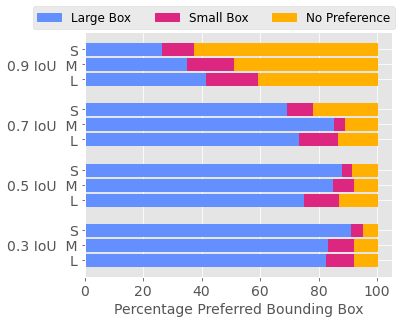

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5.5,4.5)

l_npb = np.array([survey1_df["Answer"].iloc[0]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[9]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[18]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[27]/sum(survey1_df["Answer"].iloc[27:30])*100])
l_lb = np.array([survey1_df["Answer"].iloc[1]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[10]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[19]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[28]/sum(survey1_df["Answer"].iloc[27:30])*100])
l_sb = np.array([survey1_df["Answer"].iloc[2]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[11]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[20]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[29]/sum(survey1_df["Answer"].iloc[27:30])*100])

m_npb = np.array([survey1_df["Answer"].iloc[3]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[12]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[21]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[30]/sum(survey1_df["Answer"].iloc[30:33])*100])
m_lb = np.array([survey1_df["Answer"].iloc[4]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[13]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[22]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[31]/sum(survey1_df["Answer"].iloc[30:33])*100])
m_sb = np.array([survey1_df["Answer"].iloc[5]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[14]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[23]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[32]/sum(survey1_df["Answer"].iloc[30:33])*100])

s_npb = np.array([survey1_df["Answer"].iloc[6]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[15]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[24]/sum(survey1_df["Answer"].iloc[24:27])*100, survey1_df["Answer"].iloc[33]/sum(survey1_df["Answer"].iloc[33:36])*100])
s_lb = np.array([survey1_df["Answer"].iloc[7]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[16]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[25]/sum(survey1_df["Answer"].iloc[24:27])*100, survey1_df["Answer"].iloc[34]/sum(survey1_df["Answer"].iloc[33:36])*100])
s_sb = np.array([survey1_df["Answer"].iloc[8]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[17]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[26]/sum(survey1_df["Answer"].iloc[24:27])*100, survey1_df["Answer"].iloc[35]/sum(survey1_df["Answer"].iloc[33:36])*100])

IoU = ['0.3', '0.5', '0.7', '0.9']
IoU_points = ['L', '0.3 IoU  M', 'S', 'L', '0.5 IoU  M', 'S', 'L', '0.7 IoU  M', 'S', 'L', '0.9 IoU  M', 'S']

    
# plot details
bar_width = 0.25
line_width = 1
opacity = 0.7
l_bar_positions = np.arange(len(l_lb))
m_bar_positions = l_bar_positions + bar_width
s_bar_positions = m_bar_positions + bar_width


all_points = [0, 0.25, 0.5, 1, 1.25, 1.5, 2, 2.25, 2.5, 3, 3.25, 3.5]

    # make bar plots
large_obj_l_bar = plt.barh(l_bar_positions, l_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width,
                              label='Large Box')
large_obj_s_bar = plt.barh(l_bar_positions, l_sb, bar_width - 0.05,
                              left=l_lb,
                              #alpha=opacity,
                              color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width,
                              label='Small Box')
large_obj_np_bar = plt.barh(l_bar_positions, l_npb, bar_width - 0.05,
                               left=l_lb + l_sb,
                               #alpha=opacity,
                               color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width,
                               label='No Preference')

medium_obj_l_bar = plt.barh(m_bar_positions, m_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width)
medium_obj_s_bar = plt.barh(m_bar_positions, m_sb, bar_width - 0.05,
                              left=m_lb,
                              #alpha=opacity,
                           color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width)
medium_obj_np_bar = plt.barh(m_bar_positions, m_npb, bar_width - 0.05,
                               left=m_lb + m_sb,
                               #alpha=opacity,
                            color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width)


small_obj_l_bar = plt.barh(s_bar_positions, s_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width)
small_obj_s_bar = plt.barh(s_bar_positions, s_sb, bar_width - 0.05,
                              left=s_lb,
                              #alpha=opacity,
                          color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width)
small_obj_np_bar = plt.barh(s_bar_positions, s_npb, bar_width - 0.05,
                               left=s_lb + s_sb,
                               #alpha=opacity,
                           color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width)

plt.yticks(all_points, IoU_points, fontsize=14)
plt.xlabel('Percentage Preferred Bounding Box', fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.42, 1.13),
          ncol=3, fontsize=12)
plt.savefig('survey1_IoU_object_boxsize.png', bbox_inches='tight', format='png', dpi=1200)

In [39]:
survey1_df = survey1.groupby(["ImageSize","IoU","BoxSize"]).count().reset_index()
survey1_df

,ImageSize,IoU,BoxSize,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer
0,L,0.3,No Preference,36,36,36,36,36,36,36
1,L,0.3,large box,382,382,382,382,382,382,382
2,L,0.3,small box,44,44,44,44,44,44,44
3,L,0.5,No Preference,60,60,60,60,60,60,60
4,L,0.5,large box,346,346,346,346,346,346,346
5,L,0.5,small box,56,56,56,56,56,56,56
6,L,0.7,No Preference,62,62,62,62,62,62,62
7,L,0.7,large box,338,338,338,338,338,338,338
8,L,0.7,small box,62,62,62,62,62,62,62
9,L,0.9,No Preference,189,189,189,189,189,189,189


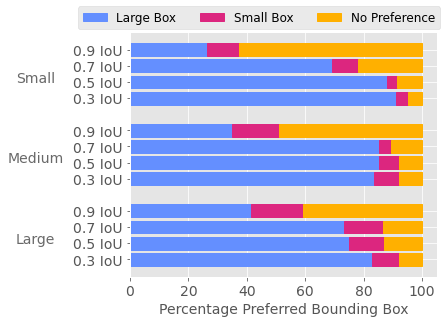

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5.5,4.5)

iou3_npb = np.array([survey1_df["Answer"].iloc[0]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[12]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[24]/sum(survey1_df["Answer"].iloc[24:27])*100])
iou3_lb = np.array([survey1_df["Answer"].iloc[1]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[13]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[25]/sum(survey1_df["Answer"].iloc[24:27])*100])
iou3_sb = np.array([survey1_df["Answer"].iloc[2]/sum(survey1_df["Answer"].iloc[0:3])*100, survey1_df["Answer"].iloc[14]/sum(survey1_df["Answer"].iloc[12:15])*100, survey1_df["Answer"].iloc[26]/sum(survey1_df["Answer"].iloc[24:27])*100])

iou5_npb = np.array([survey1_df["Answer"].iloc[3]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[15]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[27]/sum(survey1_df["Answer"].iloc[27:30])*100])
iou5_lb = np.array([survey1_df["Answer"].iloc[4]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[16]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[28]/sum(survey1_df["Answer"].iloc[27:30])*100])
iou5_sb = np.array([survey1_df["Answer"].iloc[5]/sum(survey1_df["Answer"].iloc[3:6])*100, survey1_df["Answer"].iloc[17]/sum(survey1_df["Answer"].iloc[15:18])*100, survey1_df["Answer"].iloc[29]/sum(survey1_df["Answer"].iloc[27:30])*100])

iou7_npb = np.array([survey1_df["Answer"].iloc[6]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[18]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[30]/sum(survey1_df["Answer"].iloc[30:33])*100])
iou7_lb = np.array([survey1_df["Answer"].iloc[7]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[19]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[31]/sum(survey1_df["Answer"].iloc[30:33])*100])
iou7_sb = np.array([survey1_df["Answer"].iloc[8]/sum(survey1_df["Answer"].iloc[6:9])*100, survey1_df["Answer"].iloc[20]/sum(survey1_df["Answer"].iloc[18:21])*100, survey1_df["Answer"].iloc[32]/sum(survey1_df["Answer"].iloc[30:33])*100])

iou9_npb = np.array([survey1_df["Answer"].iloc[9]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[21]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[33]/sum(survey1_df["Answer"].iloc[33:36])*100])
iou9_lb = np.array([survey1_df["Answer"].iloc[10]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[22]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[34]/sum(survey1_df["Answer"].iloc[33:36])*100])
iou9_sb = np.array([survey1_df["Answer"].iloc[11]/sum(survey1_df["Answer"].iloc[9:12])*100, survey1_df["Answer"].iloc[23]/sum(survey1_df["Answer"].iloc[21:24])*100, survey1_df["Answer"].iloc[35]/sum(survey1_df["Answer"].iloc[33:36])*100])


IoU = ['Large Object', 'Medium Object', 'Small Object']
IoU_points = ['0.3 IoU', '0.5 IoU', '0.7 IoU', '0.9 IoU', '0.3 IoU', '0.5 IoU', '0.7 IoU', '0.9 IoU', '0.3 IoU', '0.5 IoU', '0.7 IoU', '0.9 IoU']

    
# plot details
bar_width = 0.25
line_width = 1
opacity = 0.7
iou3_bar_positions = [0, 1.25, 2.5]
iou5_bar_positions = [0.25, 1.5, 2.75]
iou7_bar_positions = [0.5, 1.75, 3]
iou9_bar_positions = [0.75, 2, 3.25]


all_points = [0, 0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2, 2.5, 2.75, 3, 3.25]

    # make bar plots
iou3_l_bar = plt.barh(iou3_bar_positions, iou3_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width,
                              label='Large Box')
iou3_s_bar = plt.barh(iou3_bar_positions, iou3_sb, bar_width - 0.05,
                              left=iou3_lb,
                              #alpha=opacity,
                              color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width,
                              label='Small Box')
iou3_np_bar = plt.barh(iou3_bar_positions, iou3_npb, bar_width - 0.05,
                               left=iou3_lb + iou3_sb,
                               #alpha=opacity,
                               color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width,
                               label='No Preference')

iou5_l_bar = plt.barh(iou5_bar_positions, iou5_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width)
iou5_s_bar = plt.barh(iou5_bar_positions, iou5_sb, bar_width - 0.05,
                              left=iou5_lb,
                              #alpha=opacity,
                           color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width)
iou5_np_bar = plt.barh(iou5_bar_positions, iou5_npb, bar_width - 0.05,
                               left=iou5_lb + iou5_sb,
                               #alpha=opacity,
                            color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width)


iou7_l_bar = plt.barh(iou7_bar_positions, iou7_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width)
iou7_s_bar = plt.barh(iou7_bar_positions, iou7_sb, bar_width - 0.05,
                              left=iou7_lb,
                              #alpha=opacity,
                          color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width)
iou7_np_bar = plt.barh(iou7_bar_positions, iou7_npb, bar_width - 0.05,
                               left=iou7_lb + iou7_sb,
                               #alpha=opacity,
                           color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width)

iou9_l_bar = plt.barh(iou9_bar_positions, iou9_lb, bar_width - 0.05,
                              color='#648FFF',
                              edgecolor='#648FFF',
                              linewidth=line_width)
iou9_s_bar = plt.barh(iou9_bar_positions, iou9_sb, bar_width - 0.05,
                              left=iou9_lb,
                              #alpha=opacity,
                          color='#DC267F',
                          edgecolor='#DC267F',
                          linewidth=line_width)
iou9_np_bar = plt.barh(iou9_bar_positions, iou9_npb, bar_width - 0.05,
                               left=iou9_lb + iou9_sb,
                               #alpha=opacity,
                           color='#FFB000',
                           edgecolor='#FFB000',
                           linewidth=line_width)

plt.yticks(all_points, IoU_points, fontsize=14)
plt.xlabel('Percentage Preferred Bounding Box', fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.42, 1.13),
          ncol=3, fontsize=12)

plt.text(-39,2.75,'Small', fontsize=14, color="#696969")
plt.text(-42,1.5,'Medium', fontsize=14, color="#696969")
plt.text(-39,0.25,'Large', fontsize=14, color="#696969")

plt.savefig('survey1_object_IoU_boxsize.png', bbox_inches='tight', format='png', dpi=1200)

# Accepted Bounding Box Size

In [62]:
survey2.groupby(["IoU", "ImageSize", "BoxSize", "Accept"]).count()
survey2_df = survey2.groupby(["IoU", "ImageSize", "BoxSize", "Accept"]).count().reset_index()
survey2_df

,IoU,ImageSize,BoxSize,Accept,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer
0,0.3,L,large box,NO,37,37,37,37,37,37,37
1,0.3,L,large box,YES,211,211,211,211,211,211,211
2,0.3,L,small box,NO,116,116,116,116,116,116,116
3,0.3,L,small box,YES,132,132,132,132,132,132,132
4,0.3,M,large box,NO,22,22,22,22,22,22,22
5,0.3,M,large box,YES,226,226,226,226,226,226,226
6,0.3,M,small box,NO,149,149,149,149,149,149,149
7,0.3,M,small box,YES,99,99,99,99,99,99,99
8,0.3,S,large box,NO,31,31,31,31,31,31,31
9,0.3,S,large box,YES,217,217,217,217,217,217,217


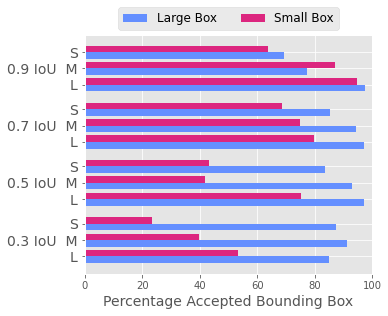

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5.5,4.5)

labels = ['L', '0.3 IoU  M', 'S', 'L', '0.5 IoU  M', 'S', 'L', '0.7 IoU  M', 'S', 'L', '0.9 IoU  M', 'S']
large = [survey2_df["Answer"].iloc[1]/sum(survey2_df["Answer"].iloc[0:2])*100, survey2_df["Answer"].iloc[5]/sum(survey2_df["Answer"].iloc[4:6])*100, survey2_df["Answer"].iloc[9]/sum(survey2_df["Answer"].iloc[8:10])*100, survey2_df["Answer"].iloc[13]/sum(survey2_df["Answer"].iloc[12:14])*100, survey2_df["Answer"].iloc[17]/sum(survey2_df["Answer"].iloc[16:18])*100, survey2_df["Answer"].iloc[21]/sum(survey2_df["Answer"].iloc[20:22])*100, survey2_df["Answer"].iloc[25]/sum(survey2_df["Answer"].iloc[24:26])*100, survey2_df["Answer"].iloc[29]/sum(survey2_df["Answer"].iloc[28:30])*100, survey2_df["Answer"].iloc[33]/sum(survey2_df["Answer"].iloc[32:34])*100, survey2_df["Answer"].iloc[37]/sum(survey2_df["Answer"].iloc[36:38])*100, survey2_df["Answer"].iloc[41]/sum(survey2_df["Answer"].iloc[40:42])*100, survey2_df["Answer"].iloc[45]/sum(survey2_df["Answer"].iloc[44:46])*100]
small = [survey2_df["Answer"].iloc[3]/sum(survey2_df["Answer"].iloc[2:4])*100, survey2_df["Answer"].iloc[7]/sum(survey2_df["Answer"].iloc[6:8])*100, survey2_df["Answer"].iloc[11]/sum(survey2_df["Answer"].iloc[10:12])*100, survey2_df["Answer"].iloc[15]/sum(survey2_df["Answer"].iloc[14:16])*100, survey2_df["Answer"].iloc[19]/sum(survey2_df["Answer"].iloc[18:20])*100, survey2_df["Answer"].iloc[23]/sum(survey2_df["Answer"].iloc[22:24])*100, survey2_df["Answer"].iloc[27]/sum(survey2_df["Answer"].iloc[26:28])*100, survey2_df["Answer"].iloc[31]/sum(survey2_df["Answer"].iloc[30:32])*100, survey2_df["Answer"].iloc[35]/sum(survey2_df["Answer"].iloc[34:36])*100, survey2_df["Answer"].iloc[39]/sum(survey2_df["Answer"].iloc[38:40])*100, survey2_df["Answer"].iloc[43]/sum(survey2_df["Answer"].iloc[42:44])*100, survey2_df["Answer"].iloc[47]/sum(survey2_df["Answer"].iloc[46:48])*100]

x = np.arange(3)  # the label locations
new_x = x
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, large[0:3], width, label='Large Box', color="#648FFF")
rects2 = ax.barh(x + width/2, small[0:3], width, label='Small Box', color="#DC267F")

x = np.arange(3) + 3.5  # the label locations
new_x = np.concatenate((new_x, x))
rects3 = ax.barh(x - width/2, large[3:6], width, color="#648FFF")
rects4 = ax.barh(x + width/2, small[3:6], width, color="#DC267F")

x = np.arange(3) + 7  # the label locations
new_x = np.concatenate((new_x, x))
rects5 = ax.barh(x - width/2, large[6:9], width, color="#648FFF")
rects6 = ax.barh(x + width/2, small[6:9], width, color="#DC267F")

x = np.arange(3) + 10.5  # the label locations
new_x = np.concatenate((new_x, x))
rects7 = ax.barh(x - width/2, large[9:12], width, color="#648FFF")
rects8 = ax.barh(x + width/2, small[9:12], width, color="#DC267F")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Accepted Bounding Box', fontsize=14)
ax.set_xlim([0,100])

ax.set_yticks(new_x)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14),
          ncol=2, fontsize=12)

fig.tight_layout()

plt.savefig('survey2_overview.png', bbox_inches='tight', format='png', dpi=1200)


In [44]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[1], survey2_df["Answer"].iloc[3]])
nobs = np.array([sum(survey2_df["Answer"].iloc[0:2]), sum(survey2_df["Answer"].iloc[2:4])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

7.680246412073675 0.00000000000001587828681035015492793


In [45]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[5], survey2_df["Answer"].iloc[7]])
nobs = np.array([sum(survey2_df["Answer"].iloc[4:6]), sum(survey2_df["Answer"].iloc[6:8])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

11.997888553182717 0.00000000000000000000000000000000364


In [46]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[9], survey2_df["Answer"].iloc[11]])
nobs = np.array([sum(survey2_df["Answer"].iloc[8:10]), sum(survey2_df["Answer"].iloc[10:12])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

14.36400272379813 0.00000000000000000000000000000000000


In [47]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[13], survey2_df["Answer"].iloc[15]])
nobs = np.array([sum(survey2_df["Answer"].iloc[12:14]), sum(survey2_df["Answer"].iloc[14:16])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

7.04949906399923 0.00000000000179563042116726947288766


In [48]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[17], survey2_df["Answer"].iloc[19]])
nobs = np.array([sum(survey2_df["Answer"].iloc[16:18]), sum(survey2_df["Answer"].iloc[18:20])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

12.178932337455482 0.00000000000000000000000000000000040


In [49]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[21], survey2_df["Answer"].iloc[23]])
nobs = np.array([sum(survey2_df["Answer"].iloc[20:22]), sum(survey2_df["Answer"].iloc[22:24])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

9.316232538049743 0.00000000000000000001205447046254490


In [50]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[25], survey2_df["Answer"].iloc[27]])
nobs = np.array([sum(survey2_df["Answer"].iloc[24:26]), sum(survey2_df["Answer"].iloc[26:28])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

6.053960818648713 0.00000000141326999081036876416585004


In [51]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[29], survey2_df["Answer"].iloc[31]])
nobs = np.array([sum(survey2_df["Answer"].iloc[28:30]), sum(survey2_df["Answer"].iloc[30:32])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

6.1135720079143745 0.00000000097425379208661991180075741


In [52]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[33], survey2_df["Answer"].iloc[35]])
nobs = np.array([sum(survey2_df["Answer"].iloc[32:34]), sum(survey2_df["Answer"].iloc[34:36])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

4.482352647622313 0.00000738246161283106650533502798850


In [53]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[37], survey2_df["Answer"].iloc[39]])
nobs = np.array([sum(survey2_df["Answer"].iloc[36:38]), sum(survey2_df["Answer"].iloc[38:40])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

1.6375813675348643 0.10150905250275904512236024856974836


In [54]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[41], survey2_df["Answer"].iloc[43]])
nobs = np.array([sum(survey2_df["Answer"].iloc[40:42]), sum(survey2_df["Answer"].iloc[42:44])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

-2.820854347770708 0.00478959438899198477329610668107307


In [43]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[45], survey2_df["Answer"].iloc[47]])
nobs = np.array([sum(survey2_df["Answer"].iloc[44:46]), sum(survey2_df["Answer"].iloc[46:48])])
stat, pval = proportions_ztest(count, nobs)
print(stat, "{0:.35f}".format(pval))

1.332164511427047 0.18280613540450463272435399630921893


### Different than the rejection

In [59]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[0], survey2_df["Answer"].iloc[1]])
nobs = np.array([sum(survey2_df["Answer"].iloc[0:2]), sum(survey2_df["Answer"].iloc[0:2])])
stat, pval = proportions_ztest(count, nobs)
print("3Ll", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[2], survey2_df["Answer"].iloc[3]])
nobs = np.array([sum(survey2_df["Answer"].iloc[2:4]), sum(survey2_df["Answer"].iloc[2:4])])
stat, pval = proportions_ztest(count, nobs)
print("3Ls", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[4], survey2_df["Answer"].iloc[5]])
nobs = np.array([sum(survey2_df["Answer"].iloc[4:6]), sum(survey2_df["Answer"].iloc[4:6])])
stat, pval = proportions_ztest(count, nobs)
print("3Ml", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[6], survey2_df["Answer"].iloc[7]])
nobs = np.array([sum(survey2_df["Answer"].iloc[6:8]), sum(survey2_df["Answer"].iloc[6:8])])
stat, pval = proportions_ztest(count, nobs)
print("3Ms", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[8], survey2_df["Answer"].iloc[9]])
nobs = np.array([sum(survey2_df["Answer"].iloc[8:10]), sum(survey2_df["Answer"].iloc[8:10])])
stat, pval = proportions_ztest(count, nobs)
print("3Ss", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[10], survey2_df["Answer"].iloc[11]])
nobs = np.array([sum(survey2_df["Answer"].iloc[10:12]), sum(survey2_df["Answer"].iloc[10:12])])
stat, pval = proportions_ztest(count, nobs)
print("3Sl", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[12], survey2_df["Answer"].iloc[13]])
nobs = np.array([sum(survey2_df["Answer"].iloc[12:14]), sum(survey2_df["Answer"].iloc[12:14])])
stat, pval = proportions_ztest(count, nobs)
print("5Ll", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[14], survey2_df["Answer"].iloc[15]])
nobs = np.array([sum(survey2_df["Answer"].iloc[14:16]), sum(survey2_df["Answer"].iloc[14:16])])
stat, pval = proportions_ztest(count, nobs)
print("5Ls", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[16], survey2_df["Answer"].iloc[17]])
nobs = np.array([sum(survey2_df["Answer"].iloc[16:18]), sum(survey2_df["Answer"].iloc[16:18])])
stat, pval = proportions_ztest(count, nobs)
print("5Ml", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[18], survey2_df["Answer"].iloc[19]])
nobs = np.array([sum(survey2_df["Answer"].iloc[18:20]), sum(survey2_df["Answer"].iloc[18:20])])
stat, pval = proportions_ztest(count, nobs)
print("5Ms", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[20], survey2_df["Answer"].iloc[21]])
nobs = np.array([sum(survey2_df["Answer"].iloc[20:22]), sum(survey2_df["Answer"].iloc[20:22])])
stat, pval = proportions_ztest(count, nobs)
print("5Sl", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[22], survey2_df["Answer"].iloc[23]])
nobs = np.array([sum(survey2_df["Answer"].iloc[22:24]), sum(survey2_df["Answer"].iloc[22:24])])
stat, pval = proportions_ztest(count, nobs)
print("5Ss", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[24], survey2_df["Answer"].iloc[25]])
nobs = np.array([sum(survey2_df["Answer"].iloc[24:26]), sum(survey2_df["Answer"].iloc[24:26])])
stat, pval = proportions_ztest(count, nobs)
print("7Ll", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[26], survey2_df["Answer"].iloc[27]])
nobs = np.array([sum(survey2_df["Answer"].iloc[26:28]), sum(survey2_df["Answer"].iloc[26:28])])
stat, pval = proportions_ztest(count, nobs)
print("7Ls", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[28], survey2_df["Answer"].iloc[29]])
nobs = np.array([sum(survey2_df["Answer"].iloc[28:30]), sum(survey2_df["Answer"].iloc[28:30])])
stat, pval = proportions_ztest(count, nobs)
print("7Ml", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[30], survey2_df["Answer"].iloc[31]])
nobs = np.array([sum(survey2_df["Answer"].iloc[30:32]), sum(survey2_df["Answer"].iloc[30:32])])
stat, pval = proportions_ztest(count, nobs)
print("7Ms", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[32], survey2_df["Answer"].iloc[33]])
nobs = np.array([sum(survey2_df["Answer"].iloc[32:34]), sum(survey2_df["Answer"].iloc[32:34])])
stat, pval = proportions_ztest(count, nobs)
print("7Sl", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[34], survey2_df["Answer"].iloc[35]])
nobs = np.array([sum(survey2_df["Answer"].iloc[34:36]), sum(survey2_df["Answer"].iloc[34:36])])
stat, pval = proportions_ztest(count, nobs)
print("7Ss", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[36], survey2_df["Answer"].iloc[37]])
nobs = np.array([sum(survey2_df["Answer"].iloc[36:38]), sum(survey2_df["Answer"].iloc[36:38])])
stat, pval = proportions_ztest(count, nobs)
print("9Ll", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[38], survey2_df["Answer"].iloc[39]])
nobs = np.array([sum(survey2_df["Answer"].iloc[38:40]), sum(survey2_df["Answer"].iloc[38:40])])
stat, pval = proportions_ztest(count, nobs)
print("9Ls", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[40], survey2_df["Answer"].iloc[41]])
nobs = np.array([sum(survey2_df["Answer"].iloc[40:42]), sum(survey2_df["Answer"].iloc[40:42])])
stat, pval = proportions_ztest(count, nobs)
print("9Ml", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[42], survey2_df["Answer"].iloc[43]])
nobs = np.array([sum(survey2_df["Answer"].iloc[42:44]), sum(survey2_df["Answer"].iloc[42:44])])
stat, pval = proportions_ztest(count, nobs)
print("9Ms", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[44], survey2_df["Answer"].iloc[45]])
nobs = np.array([sum(survey2_df["Answer"].iloc[44:46]), sum(survey2_df["Answer"].iloc[44:46])])
stat, pval = proportions_ztest(count, nobs)
print("9Sl", stat, "{0:.35f}".format(pval))

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[46], survey2_df["Answer"].iloc[47]])
nobs = np.array([sum(survey2_df["Answer"].iloc[46:48]), sum(survey2_df["Answer"].iloc[46:48])])
stat, pval = proportions_ztest(count, nobs)
print("9Ss", stat, "{0:.35f}".format(pval))


3Ll -15.625661276329417 0.00000000000000000000000000000000000
3Ls -1.436842416214199 0.15076277502664528484821460097009549
3Ml -18.319740806731037 0.00000000000000000000000000000000000
3Ms 4.490132550669373 0.00000711788655392269829064698372090
3Ss -16.703293088490064 0.00000000000000000000000000000000000
3Sl 11.853949933767142 0.00000000000000000000000000000002053
5Ll -21.013820337132664 0.00000000000000000000000000000000000
5Ls -11.315134027686819 0.00000000000000000000000000001104334
5Ml -19.21776731686491 0.00000000000000000000000000000000000
5Ms 3.5921060405354983 0.00032801631501352767174631286373199
5Sl -14.907240068222318 0.00000000000000000000000000000000000
5Ss 3.053290134455174 0.00226346981203517406966430058901096
7Ll -21.013820337132664 0.00000000000000000000000000000000000
7Ls -13.29079234998134 0.00000000000000000000000000000000000
7Ml -20.56006852883637 0.00000000000000000000000000000000000
7Ms -10.677078252031311 0.00000000000000000000000001303084879
7Sl -15.8052665783

In [82]:
m_bar_positions

array([0.25, 1.25, 2.25, 3.25])

In [68]:
all_points

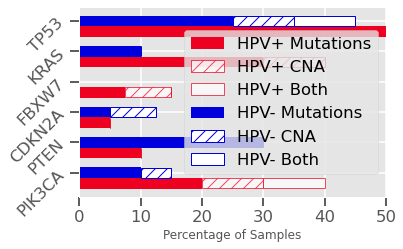

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# make up some fake data
pos_mut_pcts = np.array([20, 10, 5, 7.5, 30, 50])
pos_cna_pcts = np.array([10, 0, 0, 7.5, 10, 0])
pos_both_pcts = np.array([10, 0, 0, 0, 0, 0])
neg_mut_pcts = np.array([10, 30, 5, 0, 10, 25])
neg_cna_pcts = np.array([5, 0, 7.5, 0, 0, 10])
neg_both_pcts = np.array([0, 0, 0, 0, 0, 10])
genes = ['PIK3CA', 'PTEN', 'CDKN2A', 'FBXW7', 'KRAS', 'TP53']

 
    # plot details
bar_width = 0.35
epsilon = .015
line_width = 1
opacity = 0.7
pos_bar_positions = np.arange(len(pos_mut_pcts))
neg_bar_positions = pos_bar_positions + bar_width

    # make bar plots
hpv_pos_mut_bar = plt.barh(pos_bar_positions, pos_mut_pcts, bar_width,
                              color='#ED0020',
                              label='HPV+ Mutations')
hpv_pos_cna_bar = plt.barh(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                              left=pos_mut_pcts,
                              alpha=opacity,
                              color='white',
                              edgecolor='#ED0020',
                              linewidth=line_width,
                              hatch='//',
                              label='HPV+ CNA')
hpv_pos_both_bar = plt.barh(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                               left=pos_cna_pcts+pos_mut_pcts,
                               alpha=opacity,
                               color='white',
                               edgecolor='#ED0020',
                               linewidth=line_width,
                               hatch='0',
                               label='HPV+ Both')


hpv_neg_mut_bar = plt.barh(neg_bar_positions, neg_mut_pcts, bar_width,
                              color='#0000DD',
                              label='HPV- Mutations')
hpv_neg_cna_bar = plt.barh(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                              left=neg_mut_pcts,
                              color="white",
                              hatch='//',
                              edgecolor='#0000DD',
                              ecolor="#0000DD",
                              linewidth=line_width,
                              label='HPV- CNA')
hpv_neg_both_bar = plt.barh(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                               left=neg_cna_pcts+neg_mut_pcts,
                               color="white",
                               hatch='0',
                               edgecolor='#0000DD',
                               ecolor="#0000DD",
                               linewidth=line_width,
                               label='HPV- Both')
plt.yticks(neg_bar_positions, genes, rotation=45)
plt.xlabel('Percentage of Samples')
plt.legend(loc='best')


In [59]:
survey2.groupby(["IoU", "BoxSize", "Accept"]).count()

StartDate  EndDate  Duration  ResponseId  Background  \
IoU BoxSize   Accept                                                         
0.3 large box NO             90       90        90          90          90   
              YES           654      654       654         654         654   
    small box NO            455      455       455         455         455   
              YES           289      289       289         289         289   
0.5 large box NO             65       65        65          65          65   
              YES           679      679       679         679         679   
    small box NO            346      346       346         346         346   
              YES           398      398       398         398         398   
0.7 large box NO             58       58        58          58          58   
              YES           706      706       706         706         706   
    small box NO            185      185       185         185         185   
              YES           539      539       539         539         539   
0.9 large box NO            138      138       138         138         138   
              YES           606      606       606         606         606   
    small box NO            135      135       135         135         135   
              YES           609      609       609         609         609   

                      Question  Answer  ImageSize  
IoU BoxSize   Accept                               
0.3 large box NO            90      90         90  
              YES          654     654        654  
    small box NO           455     455        455  
              YES          289     289        289  
0.5 large box NO            65      65         65  
              YES          679     679        679  
    small box NO           346     346        346  
              YES          398     398        398  
0.7 large box NO            58      58         58  
              YES          706     706        706  
    small box NO           185     185        185  
              YES          539     539        539  
0.9 large box NO           138     138        138  
              YES          606     606        606  
    small box NO           135     135        135  
              YES          609     609        609

In [60]:
survey2_df = survey2.groupby(["IoU", "BoxSize", "Accept"]).count().reset_index()

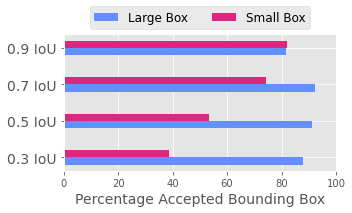

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5,3.2)

labels = ['0.3 IoU', '0.5 IoU', '0.7 IoU', '0.9 IoU']
large = [survey2_df["Answer"].iloc[1]/sum(survey2_df["Answer"].iloc[0:2])*100, survey2_df["Answer"].iloc[5]/sum(survey2_df["Answer"].iloc[4:6])*100, survey2_df["Answer"].iloc[9]/sum(survey2_df["Answer"].iloc[8:10])*100, survey2_df["Answer"].iloc[13]/sum(survey2_df["Answer"].iloc[12:14])*100]
small = [survey4_df["Answer"].iloc[3]/sum(survey2_df["Answer"].iloc[2:4])*100, survey2_df["Answer"].iloc[7]/sum(survey2_df["Answer"].iloc[6:8])*100, survey2_df["Answer"].iloc[11]/sum(survey2_df["Answer"].iloc[10:12])*100, survey2_df["Answer"].iloc[15]/sum(survey2_df["Answer"].iloc[14:16])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, large, width, label='Large Box', color="#648FFF")
rects2 = ax.barh(x + width/2, small, width, label='Small Box', color="#DC267F")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Accepted Bounding Box', fontsize=14)
ax.set_xlim([0,100])
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=2, fontsize=12)

fig.tight_layout()

plt.savefig('survey2_overview.png', bbox_inches='tight', format='png', dpi=1200)

In [62]:
import numpy as np
table = np.zeros((sum(survey2_df["Answer"].iloc[14:16]), 2))

subset_survey2 = survey2[(survey2["IoU"] == 0.9) & (survey2["BoxSize"] == "small box")]
for i in range(len(subset_survey2)):
    if str(subset_survey2["Accept"].iloc[i]).lower() == "yes":
        table[i,0] = 1
    if str(subset_survey2["Accept"].iloc[i]).lower() == "no":
        table[i,1] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

301.98387096774195
1.217747853628997e-67


In [63]:
import numpy as np
table = np.zeros((sum(survey2_df["Answer"].iloc[12:14]), 2))

subset_survey2 = survey2[(survey2["IoU"] == 0.9) & (survey2["BoxSize"] == "large box")]
for i in range(len(subset_survey2)):
    if str(subset_survey2["Accept"].iloc[i]).lower() == "yes":
        table[i,0] = 1
    if str(subset_survey2["Accept"].iloc[i]).lower() == "no":
        table[i,1] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

294.38709677419354
5.503917472632513e-66


In [64]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[13], survey2_df["Answer"].iloc[15]])
nobs = np.array([sum(survey2_df["Answer"].iloc[12:14]), sum(survey2_df["Answer"].iloc[14:16])])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-0.20093392041773409 0.840750243925553


## H2: Higher IoU are more accepted than lower IoU, for each object size.

In [80]:
survey2_df = survey2.groupby(["IoU", "ImageSize", "Accept"]).count().reset_index()
survey2_df

,IoU,ImageSize,Accept,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer,BoxSize
0,0.3,L,NO,153,153,153,153,153,153,153,153
1,0.3,L,YES,343,343,343,343,343,343,343,343
2,0.3,M,NO,171,171,171,171,171,171,171,171
3,0.3,M,YES,325,325,325,325,325,325,325,325
4,0.3,S,NO,221,221,221,221,221,221,221,221
5,0.3,S,YES,275,275,275,275,275,275,275,275
6,0.5,L,NO,68,68,68,68,68,68,68,68
7,0.5,L,YES,428,428,428,428,428,428,428,428
8,0.5,M,NO,161,161,161,161,161,161,161,161
9,0.5,M,YES,335,335,335,335,335,335,335,335


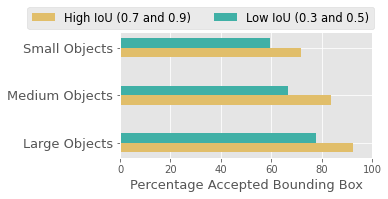

In [83]:
import matplotlib.pyplot as plt
import numpy as np

large_low_yes = survey2_df["Answer"].iloc[1]+survey2_df["Answer"].iloc[7]
large_low_all = sum(survey2_df["Answer"].iloc[0:2]) + sum(survey2_df["Answer"].iloc[6:8])

medium_low_yes = survey2_df["Answer"].iloc[3]+survey2_df["Answer"].iloc[9]
medium_low_all = sum(survey2_df["Answer"].iloc[2:4]) + sum(survey2_df["Answer"].iloc[8:10])

small_low_yes = survey2_df["Answer"].iloc[5]+survey2_df["Answer"].iloc[11]
small_low_all = sum(survey2_df["Answer"].iloc[4:6]) + sum(survey2_df["Answer"].iloc[10:12])

large_high_yes = survey2_df["Answer"].iloc[13]+survey2_df["Answer"].iloc[19]
large_high_all = sum(survey2_df["Answer"].iloc[12:14]) + sum(survey2_df["Answer"].iloc[18:20])

medium_high_yes = survey2_df["Answer"].iloc[15]+survey2_df["Answer"].iloc[21]
medium_high_all = sum(survey2_df["Answer"].iloc[14:16]) + sum(survey2_df["Answer"].iloc[20:22])

small_high_yes = survey2_df["Answer"].iloc[17]+survey2_df["Answer"].iloc[23]
small_high_all = sum(survey2_df["Answer"].iloc[16:18]) + sum(survey2_df["Answer"].iloc[22:24])

all_sizes_low_yes = large_low_yes + small_low_yes + medium_low_yes
all_sizes_high_yes = large_high_yes + small_high_yes + medium_high_yes

all_sizes_low = large_low_all + medium_low_all + small_low_all
all_sizes_high = large_high_all + medium_high_all + small_high_all


plt.rcParams["figure.figsize"] = (5.5,3)

#labels = ['Large Objects', 'Medium Objects', 'Small Objects', "All Objects"]
#high = [large_high_yes/large_high_all*100, medium_high_yes/medium_high_all*100, small_high_yes/small_high_all*100, all_sizes_high_yes/all_sizes_high*100]
#low = [large_low_yes/large_low_all*100, medium_low_yes/medium_low_all*100, small_low_yes/small_low_all*100, all_sizes_low_yes/all_sizes_low*100]

labels = ['Large Objects', 'Medium Objects', 'Small Objects']
high = [large_high_yes/large_high_all*100, medium_high_yes/medium_high_all*100, small_high_yes/small_high_all*100]
low = [large_low_yes/large_low_all*100, medium_low_yes/medium_low_all*100, small_low_yes/small_low_all*100]


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, high, width, label='High IoU (0.7 and 0.9)', color='#E1BE6A')
rects2 = ax.barh(x + width/2, low, width, label='Low IoU (0.3 and 0.5)', color='#40B0A6')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Accepted Bounding Box', fontsize=13)
ax.set_xlim([0,100])
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=13)
ax.legend(loc='upper center', bbox_to_anchor=(0.32, 1.25),
          ncol=2, fontsize=11.5)

fig.tight_layout()

plt.savefig('survey2_objectsize_acceptance.png', bbox_inches='tight', format='png', dpi=1200)

In [91]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([all_sizes_low_yes, all_sizes_high_yes])
nobs = np.array([all_sizes_low, all_sizes_high])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-13.218775466915258 6.836791080903759e-40


In [92]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([large_low_yes, large_high_yes])
nobs = np.array([large_low_all, large_high_all])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-9.12437382931121 7.21521438327596e-20


In [93]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([medium_low_yes, medium_high_yes])
nobs = np.array([medium_low_all, medium_high_all])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-8.941951662326076 3.8235684383107646e-19


In [94]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([small_low_yes, small_high_yes])
nobs = np.array([small_low_all, small_high_all])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-5.8120179274040185 6.172422847933689e-09


## H3: The most preferred box size is also the most accepted box size, for all object sizes.

In [101]:
survey2_df = survey2.groupby(["ImageSize","BoxSize","Accept"]).count().reset_index()
survey2_df

,ImageSize,BoxSize,Accept,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer,IoU
0,L,large box,NO,57,57,57,57,57,57,57,57
1,L,large box,YES,935,935,935,935,935,935,935,935
2,L,small box,NO,240,240,240,240,240,240,240,240
3,L,small box,YES,752,752,752,752,752,752,752,752
4,M,large box,NO,110,110,110,110,110,110,110,110
5,M,large box,YES,902,902,902,902,902,902,902,902
6,M,small box,NO,382,382,382,382,382,382,382,382
7,M,small box,YES,590,590,590,590,590,590,590,590
8,S,large box,NO,184,184,184,184,184,184,184,184
9,S,large box,YES,808,808,808,808,808,808,808,808


In [103]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[1], survey2_df["Answer"].iloc[3]])
nobs = np.array([sum(survey2_df["Answer"].iloc[0:2]), sum(survey2_df["Answer"].iloc[2:4])])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

11.515589039751392 1.1010457947980047e-30


In [104]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[5], survey2_df["Answer"].iloc[7]])
nobs = np.array([sum(survey2_df["Answer"].iloc[4:6]), sum(survey2_df["Answer"].iloc[6:8])])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

14.659428758675045 1.1725527330225859e-48


In [105]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([survey2_df["Answer"].iloc[9], survey2_df["Answer"].iloc[11]])
nobs = np.array([sum(survey2_df["Answer"].iloc[8:10]), sum(survey2_df["Answer"].iloc[10:12])])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

14.884436155546876 4.1597852819924315e-50


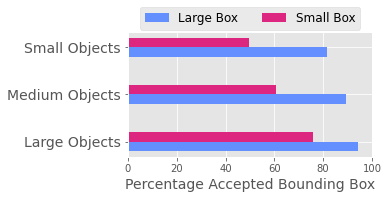

In [102]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5.5,3)

labels = ['Large Objects', 'Medium Objects', 'Small Objects']
large = [survey2_df["Answer"].iloc[1]/sum(survey2_df["Answer"].iloc[0:2])*100, survey2_df["Answer"].iloc[5]/sum(survey2_df["Answer"].iloc[4:6])*100, survey2_df["Answer"].iloc[9]/sum(survey2_df["Answer"].iloc[8:10])*100]
small = [survey2_df["Answer"].iloc[3]/sum(survey2_df["Answer"].iloc[2:4])*100, survey2_df["Answer"].iloc[7]/sum(survey2_df["Answer"].iloc[6:8])*100, survey2_df["Answer"].iloc[11]/sum(survey2_df["Answer"].iloc[10:12])*100]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, large, width, label='Large Box', color="#648FFF")
rects2 = ax.barh(x + width/2, small, width, label='Small Box', color="#DC267F")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Percentage Accepted Bounding Box', fontsize=14)
ax.set_xlim([0,100])
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=2, fontsize=12)

fig.tight_layout()

plt.savefig('survey2_object_box_acceptance.png', bbox_inches='tight', format='png', dpi=1200)

In [91]:
import numpy as np
table = np.zeros((sum(survey2_df["Answer"].iloc[0:4]), 3))

subset_survey2 = survey2[survey2["ImageSize"] == "L"]
for i in range(len(subset_survey2)):
    if str(subset_survey2["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey2["BoxSize"].iloc[i]).lower() == "small box":
        table[i,1] = 1
    if str(subset_survey2["BoxSize"].iloc[i]).lower() == "large box":
        table[i,2] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

df2 = pd.DataFrame(np.array(table), columns=['n', 's', 'l'])

import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

992.0
3.889886915778699e-216


,l,n,s
l,1.000000e+00,3.624696e-244,1.000000e+00
n,3.624696e-244,1.000000e+00,3.624696e-244
s,1.000000e+00,3.624696e-244,1.000000e+00


In [74]:
survey1_df = survey1.groupby(["ImageSize","BoxSize"]).count().reset_index()
survey1_df

,ImageSize,BoxSize,StartDate,EndDate,Duration,ResponseId,Background,Question,Answer,IoU
0,L,No Preference,347,347,347,347,347,347,347,347
1,L,large box,1258,1258,1258,1258,1258,1258,1258,1258
2,L,small box,243,243,243,243,243,243,243,243
3,M,No Preference,348,348,348,348,348,348,348,348
4,M,large box,1334,1334,1334,1334,1334,1334,1334,1334
5,M,small box,166,166,166,166,166,166,166,166
6,S,No Preference,454,454,454,454,454,454,454,454
7,S,large box,1268,1268,1268,1268,1268,1268,1268,1268
8,S,small box,126,126,126,126,126,126,126,126


In [92]:
survey1.groupby(["ImageSize", "BoxSize"]).count()

StartDate  EndDate  Duration  ResponseId  Background  \
ImageSize BoxSize                                                               
L         No Preference        347      347       347         347         347   
          large box           1258     1258      1258        1258        1258   
          small box            243      243       243         243         243   
M         No Preference        348      348       348         348         348   
          large box           1334     1334      1334        1334        1334   
          small box            166      166       166         166         166   
S         No Preference        454      454       454         454         454   
          large box           1268     1268      1268        1268        1268   
          small box            126      126       126         126         126   

                         Question  Answer   IoU  
ImageSize BoxSize                                
L         No Preference       347     347   347  
          large box          1258    1258  1258  
          small box           243     243   243  
M         No Preference       348     348   348  
          large box          1334    1334  1334  
          small box           166     166   166  
S         No Preference       454     454   454  
          large box          1268    1268  1268  
          small box           126     126   126

In [93]:
obj_box = survey1.groupby(["ImageSize", "BoxSize"]).count().reset_index()

In [96]:
import numpy as np
table = np.zeros((sum(obj_box["Answer"].iloc[0:3]), 3))

subset_survey1 = survey1[survey1["ImageSize"] == "L"]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,2] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

df2 = pd.DataFrame(np.array(table), columns=['n', 's', 'l'])

import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

1012.4253246753246
1.4276905246930172e-220


,l,n,s
l,1.000000e+00,3.149992e-221,3.190519e-274
n,3.149992e-221,1.000000e+00,8.550158e-04
s,3.190519e-274,8.550158e-04,1.000000e+00


In [98]:
import numpy as np
table = np.zeros((sum(obj_box["Answer"].iloc[3:6]), 3))

subset_survey1 = survey1[survey1["ImageSize"] == "M"]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,2] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

df2 = pd.DataFrame(np.array(table), columns=['n', 's', 'l'])

import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

1282.2207792207791
3.709330250864337e-279


,l,n,s
l,1.000000e+00,7.171186e-259,0.000000e+00
n,7.171186e-259,1.000000e+00,6.460205e-10
s,0.000000e+00,6.460205e-10,1.000000e+00


In [99]:
import numpy as np
table = np.zeros((sum(obj_box["Answer"].iloc[6:9]), 3))

subset_survey1 = survey1[survey1["ImageSize"] == "S"]
for i in range(len(subset_survey1)):
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "no preference":
        table[i,0] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "small box":
        table[i,1] = 1
    if str(subset_survey1["BoxSize"].iloc[i]).lower() == "large box":
        table[i,2] = 1

#print(table)

from statsmodels.sandbox.stats.runs import cochrans_q 

st, pvalue = cochrans_q(table)

print(st)
print(pvalue)

df2 = pd.DataFrame(np.array(table), columns=['n', 's', 'l'])

import numpy as np
import scikit_posthocs as sp

longDf = pd.melt(df2, var_name='options', value_name='chosen')
longDf.head()

sp.posthoc_dunn(longDf, val_col='chosen', group_col='options', p_adjust = 'bonferroni')

1122.4805194805194
1.8048959600956478e-244


,l,n,s
l,1.000000e+00,5.986019e-177,0.000000e+00
n,5.986019e-177,1.000000e+00,7.566469e-30
s,0.000000e+00,7.566469e-30,1.000000e+00
